09:52:12 - cmdstanpy - INFO - Chain [1] start processing
09:52:55 - cmdstanpy - INFO - Chain [1] done processing


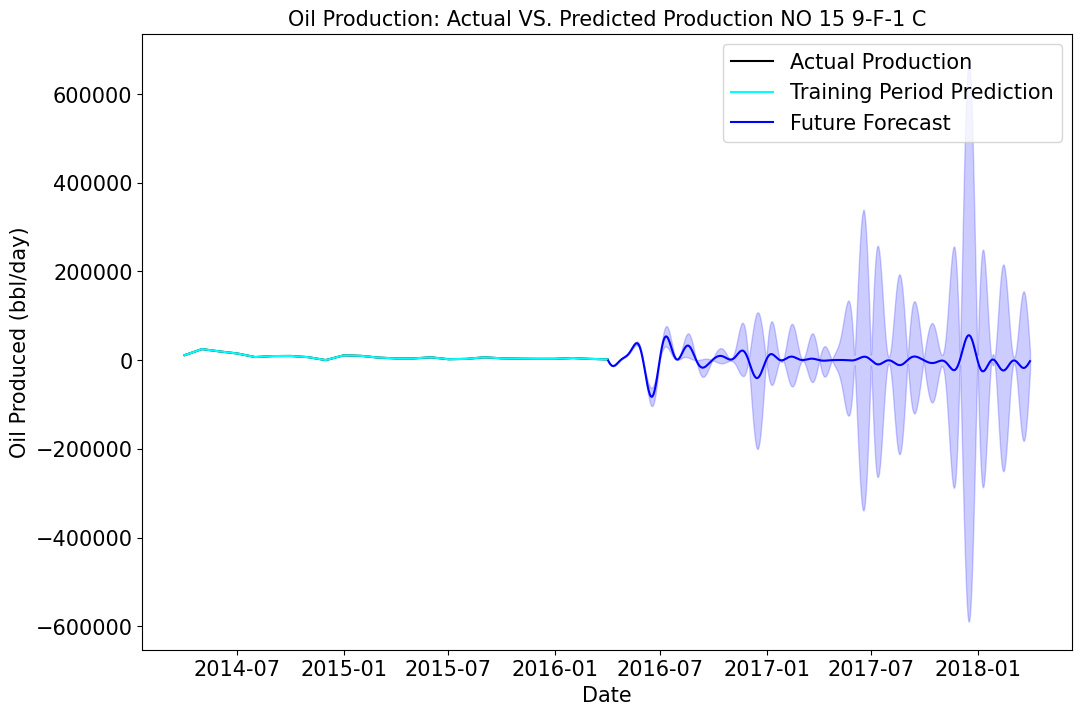

09:52:56 - cmdstanpy - INFO - Chain [1] start processing
09:52:56 - cmdstanpy - INFO - Chain [1] done processing


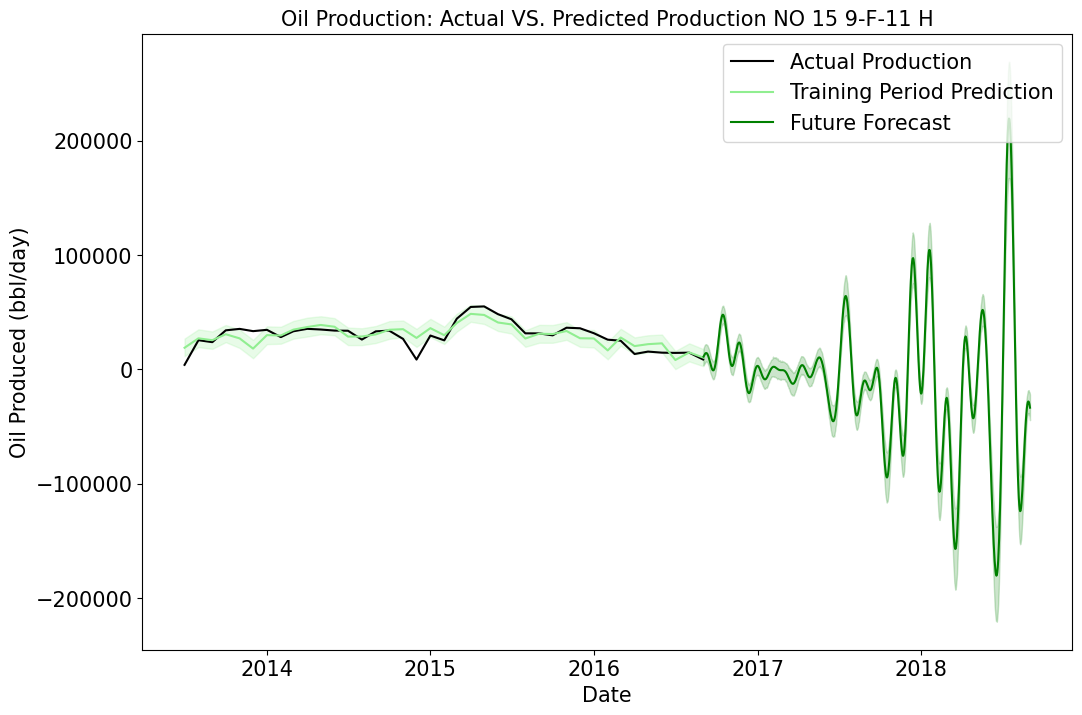

09:52:57 - cmdstanpy - INFO - Chain [1] start processing
09:52:58 - cmdstanpy - INFO - Chain [1] done processing


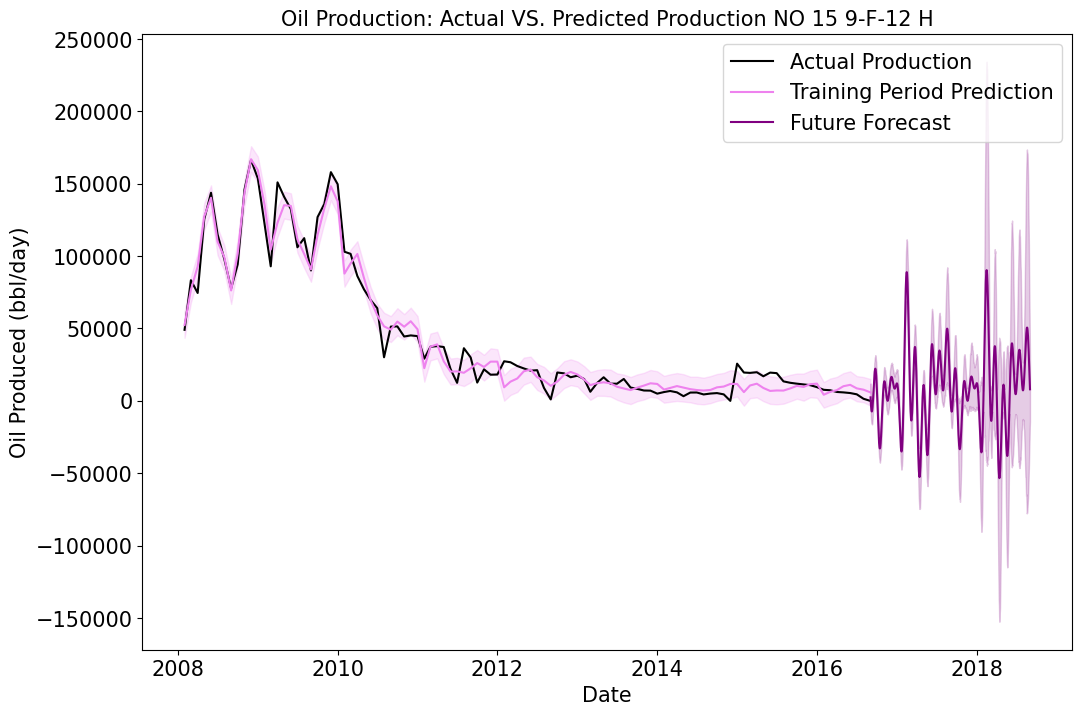

09:52:59 - cmdstanpy - INFO - Chain [1] start processing
09:52:59 - cmdstanpy - INFO - Chain [1] done processing


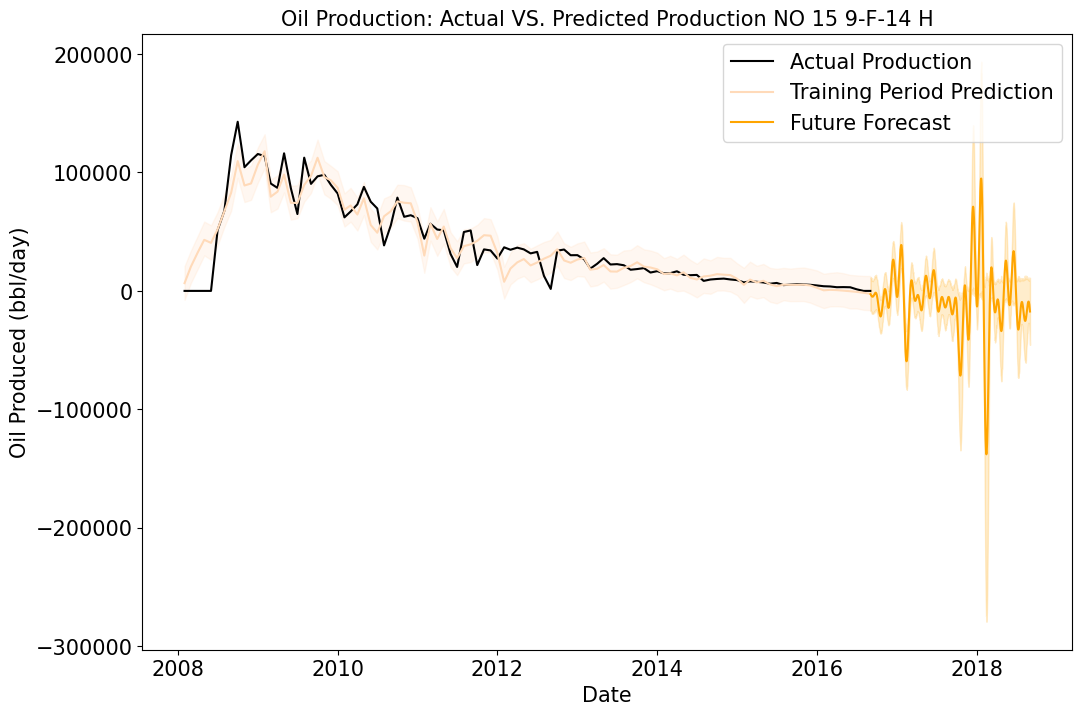

09:53:00 - cmdstanpy - INFO - Chain [1] start processing
09:53:00 - cmdstanpy - INFO - Chain [1] done processing


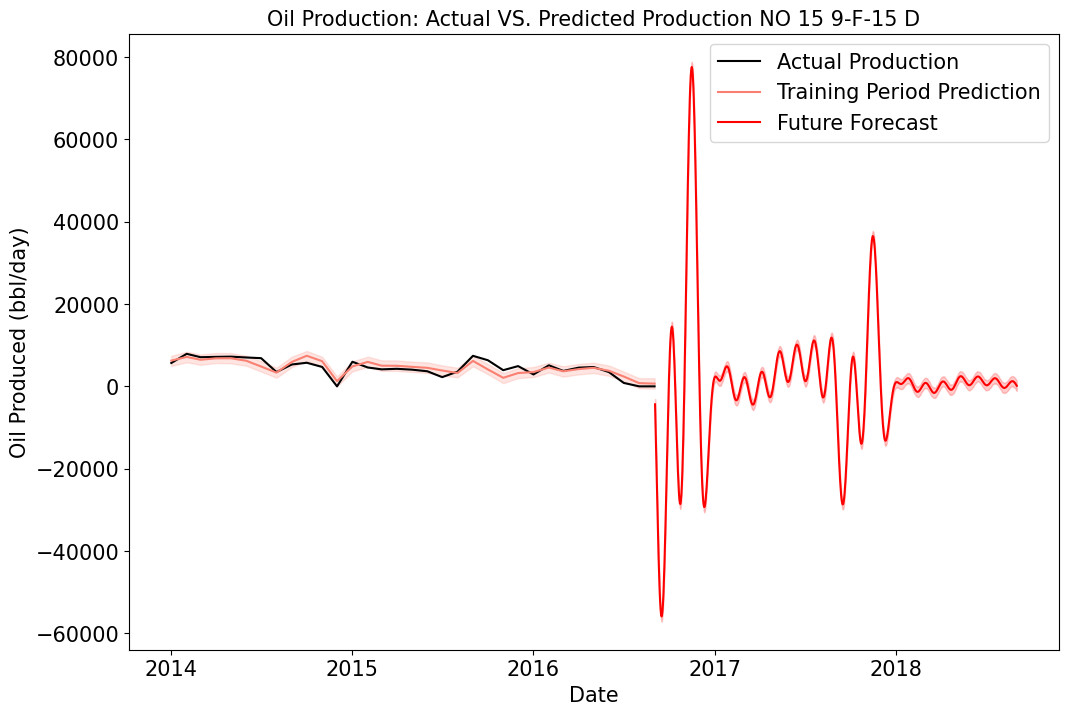

In [3]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Function to prepare data, train model, and plot results for individual wells
def prepare_and_plot(file_path, sheet_name, title_suffix, forecast_color, prediction_color):
    # Load the data
    df = pd.read_excel(file_path, sheet_name=sheet_name)

    # Rename columns to match Prophet's expectations
    df.rename(columns={'Date': 'ds', 'Oil': 'y'}, inplace=True)

    # Ensure the date column is in datetime format
    df['ds'] = pd.to_datetime(df['ds'])

    # Initialize and fit the model using all available data
    model = Prophet(seasonality_mode='multiplicative', changepoint_prior_scale=0.2, interval_width=0.75)
    model.fit(df)

    # Prepare future dates for prediction (next 2 years)
    future = model.make_future_dataframe(periods=2*365)

    # Make predictions
    forecast = model.predict(future)

    # Split the forecast into training period predictions and future forecasts
    train_pred = forecast[forecast['ds'] <= df['ds'].max()]
    future_forecast = forecast[forecast['ds'] > df['ds'].max()]

    # Plot Actual vs Predicted production with confidence intervals
    plt.figure(figsize=(12, 8))
    plt.plot(df['ds'], df['y'], label='Actual Production', color='black')
    plt.plot(train_pred['ds'], train_pred['yhat'], label='Training Period Prediction', color=prediction_color)
    plt.fill_between(train_pred['ds'], train_pred['yhat_lower'], train_pred['yhat_upper'], color=prediction_color, alpha=0.2)
    plt.plot(future_forecast['ds'], future_forecast['yhat'], label='Future Forecast', color=forecast_color)
    plt.fill_between(future_forecast['ds'], future_forecast['yhat_lower'], future_forecast['yhat_upper'], color=forecast_color, alpha=0.2)
    plt.xlabel('Date', fontsize=15)
    plt.ylabel('Oil Produced (bbl/day)', fontsize=15)
    plt.legend(loc='upper right', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f'Oil Production: Actual VS. Predicted Production {title_suffix}', fontsize=15)
    plt.show()

    # Save the forecast to a CSV file
    forecast.to_csv(f'forecast_{title_suffix}.csv', index=False)
    
    return df, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# File path to the Excel file
file_path = 'Volve Well wise data.xlsx'

# Prepare and plot for each sheet with specific forecast colors
actual_1, forecast_1 = prepare_and_plot(file_path, "NO 15 9-F-1 C", title_suffix="NO 15 9-F-1 C", forecast_color='blue', prediction_color='cyan')
actual_2, forecast_2 = prepare_and_plot(file_path, "NO 15 9-F-11 H", title_suffix="NO 15 9-F-11 H", forecast_color='green', prediction_color='lightgreen')
actual_3, forecast_3 = prepare_and_plot(file_path, "NO 15 9-F-12 H", title_suffix="NO 15 9-F-12 H", forecast_color='purple', prediction_color='violet')
actual_4, forecast_4 = prepare_and_plot(file_path, "NO 15 9-F-14 H", title_suffix="NO 15 9-F-14 H", forecast_color='orange', prediction_color='peachpuff')
actual_5, forecast_5 = prepare_and_plot(file_path, "NO 15 9-F-15 D", title_suffix="NO 15 9-F-15 D", forecast_color='red', prediction_color='salmon')



         Date  Oil
0  2007-09-01  NaN
1  2007-10-01  NaN
2  2007-11-01  NaN
3  2007-12-01  NaN
4  2008-01-01  NaN
          ds   y
0 2007-09-01 NaN
1 2007-10-01 NaN
2 2007-11-01 NaN
3 2007-12-01 NaN
4 2008-01-01 NaN


10:02:33 - cmdstanpy - INFO - Chain [1] start processing
10:02:33 - cmdstanpy - INFO - Chain [1] done processing


            ds           yhat     yhat_lower     yhat_upper
0   2008-02-01   63736.505253   42497.760666   84722.852590
1   2008-03-01   94096.295036   72656.279148  116621.014562
2   2008-04-01  125054.532328  101166.603800  147031.259577
3   2008-05-01  161516.241644  138992.851547  182647.568684
4   2008-06-01  167893.282560  144924.403525  190109.602078
..         ...            ...            ...            ...
829 2018-08-28   42808.875168  -58848.758052  140127.666593
830 2018-08-29   36658.598409  -52800.998658  116775.746130
831 2018-08-30   30747.059112  -40893.567558   99257.102695
832 2018-08-31   25203.347358  -36095.228925   85120.028776
833 2018-09-01   20143.191166  -32318.041043   70601.931210

[834 rows x 4 columns]


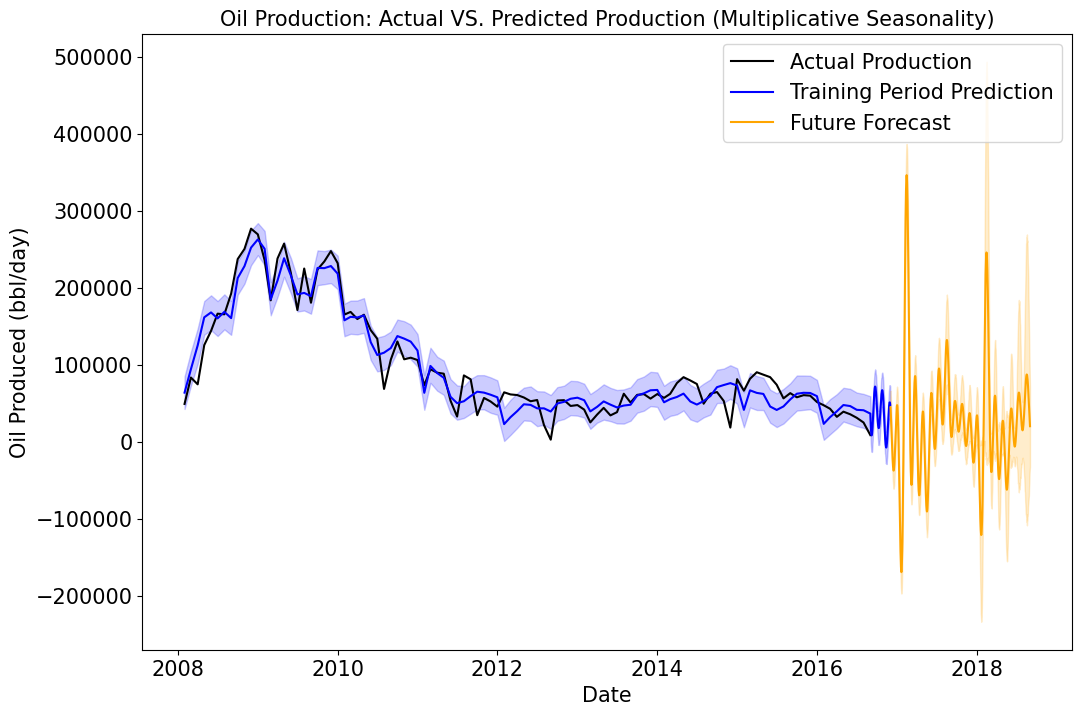

In [11]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the data
excel_path = 'Volve prophet.csv'
df = pd.read_csv(excel_path)

# Display the first few rows of the dataframe
print(df.head())

# Rename columns to match Prophet's expectations
df.rename(columns={'Date': 'ds', 'Oil': 'y'}, inplace=True)

# Ensure the date column is in datetime format
df['ds'] = pd.to_datetime(df['ds'])

# Display the first few rows to verify the changes
print(df.head())

# Initialize and fit the model using all available data
model = Prophet(seasonality_mode='multiplicative', changepoint_prior_scale=0.2, interval_width=0.75)
model.fit(df)

# Prepare future dates for prediction (next 2 years)
future = model.make_future_dataframe(periods=2*365)

# Make predictions
forecast = model.predict(future)

# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Save forecast to CSV
forecast.to_csv('forecast.csv', index=False)

# Split the forecast into training period predictions and future forecasts
train_pred = forecast[forecast['ds'] <= df['ds'].max()]
future_forecast = forecast[forecast['ds'] > df['ds'].max()]

# Define colors and title suffix
prediction_color = 'blue'
forecast_color = 'orange'
title_suffix = '(Multiplicative Seasonality)'

# Plot Actual vs Predicted production with confidence intervals
plt.figure(figsize=(12, 8))
plt.plot(df['ds'], df['y'], label='Actual Production', color='black')
plt.plot(train_pred['ds'], train_pred['yhat'], label='Training Period Prediction', color=prediction_color)
plt.fill_between(train_pred['ds'], train_pred['yhat_lower'], train_pred['yhat_upper'], color=prediction_color, alpha=0.2)
plt.plot(future_forecast['ds'], future_forecast['yhat'], label='Future Forecast', color=forecast_color)
plt.fill_between(future_forecast['ds'], future_forecast['yhat_lower'], future_forecast['yhat_upper'], color=forecast_color, alpha=0.2)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Oil Produced (bbl/day)', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(f'Oil Production: Actual VS. Predicted Production {title_suffix}', fontsize=15)
plt.show()


          ds   y
0 2007-09-01 NaN
1 2007-10-01 NaN
2 2007-11-01 NaN
3 2007-12-01 NaN
4 2008-01-01 NaN
          ds   y
0 2007-09-01 NaN
1 2007-10-01 NaN
2 2007-11-01 NaN
3 2007-12-01 NaN
4 2008-01-01 NaN


10:04:08 - cmdstanpy - INFO - Chain [1] start processing
10:04:08 - cmdstanpy - INFO - Chain [1] done processing


            ds           yhat     yhat_lower     yhat_upper
0   2008-02-01   63736.505253   43362.479009   88783.554206
1   2008-03-01   94096.295036   70770.577277  116958.309630
2   2008-04-01  125054.532328  101937.230375  147093.894176
3   2008-05-01  161516.241644  140378.237693  183132.635462
4   2008-06-01  167893.282560  145268.384964  189291.725265
..         ...            ...            ...            ...
829 2018-08-28   42808.875168  -44778.467844  143464.617721
830 2018-08-29   36658.598409  -39700.012865  124147.187609
831 2018-08-30   30747.059112  -34401.656276  104596.594469
832 2018-08-31   25203.347358  -34308.429968   86281.209525
833 2018-09-01   20143.191166  -28306.803842   73867.415295

[834 rows x 4 columns]


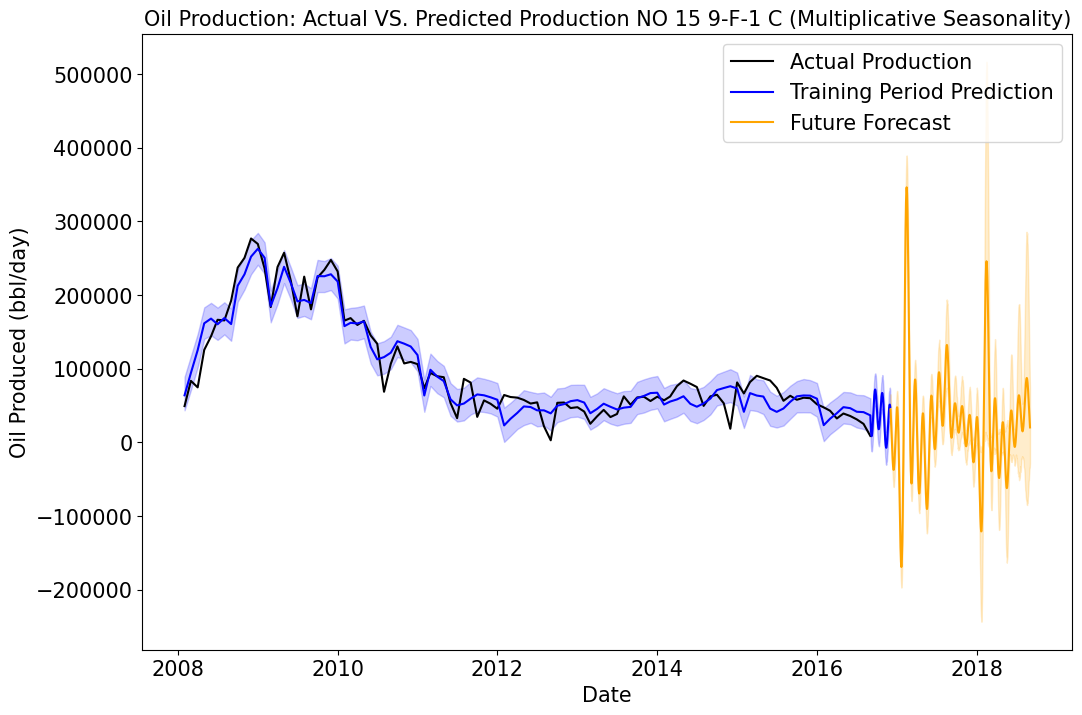

In [13]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

file_path = 'Volve Well wise data.xlsx' 

df_1 = pd.read_excel(file_path, sheet_name="NO 15 9-F-1 C") 
# Display the first few rows of the dataframe
print(df.head())

# Rename columns to match Prophet's expectations
df.rename(columns={'Date': 'ds', 'Oil': 'y'}, inplace=True)

# Ensure the date column is in datetime format
df['ds'] = pd.to_datetime(df['ds'])

# Display the first few rows to verify the changes
print(df.head())

# Initialize and fit the model using all available data
model = Prophet(seasonality_mode='multiplicative', changepoint_prior_scale=0.2, interval_width=0.75)
model.fit(df)

# Prepare future dates for prediction (next 2 years)
future = model.make_future_dataframe(periods=2*365)

# Make predictions
forecast = model.predict(future)

# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Save forecast to CSV
forecast.to_csv('forecast.csv', index=False)

# Split the forecast into training period predictions and future forecasts
train_pred = forecast[forecast['ds'] <= df['ds'].max()]
future_forecast = forecast[forecast['ds'] > df['ds'].max()]

# Define colors and title suffix
prediction_color = 'blue'
forecast_color = 'orange'
title_suffix = '(Multiplicative Seasonality)'

# Plot Actual vs Predicted production with confidence intervals
plt.figure(figsize=(12, 8))
plt.plot(df['ds'], df['y'], label='Actual Production', color='black')
plt.plot(train_pred['ds'], train_pred['yhat'], label='Training Period Prediction', color=prediction_color)
plt.fill_between(train_pred['ds'], train_pred['yhat_lower'], train_pred['yhat_upper'], color=prediction_color, alpha=0.2)
plt.plot(future_forecast['ds'], future_forecast['yhat'], label='Future Forecast', color=forecast_color)
plt.fill_between(future_forecast['ds'], future_forecast['yhat_lower'], future_forecast['yhat_upper'], color=forecast_color, alpha=0.2)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Oil Produced (bbl/day)', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(f'Oil Production: Actual VS. Predicted Production NO 15 9-F-1 C {title_suffix}', fontsize=15)
plt.show()
